<a href="https://colab.research.google.com/github/TexasherScript/python-sql/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('/content/ba979207-fbd0-4f96-b855-ac7540e03b23.csv')

df.head()




,_id,FinancialYear,Country,Dataset,DatasetQF,NumberOfAdmissions,NumberOfDischarges,NumberOfStays,NumberOfPatients,NumberOfHospitalResidents,NumberOfHospitalResidentsQF
0,1,1997/98,S92000003,Total,d,41460,41780,38150,28180,7840,
1,2,1997/98,S92000003,Total,d,9450,9480,8700,7760,,:
2,3,1997/98,S92000003,SMR04,,32010,32300,29450,21530,7840,
3,4,1998/99,S92000003,Total,d,41380,41900,38010,28400,7330,
4,5,1998/99,S92000003,Total,d,9830,9840,8920,7890,,:


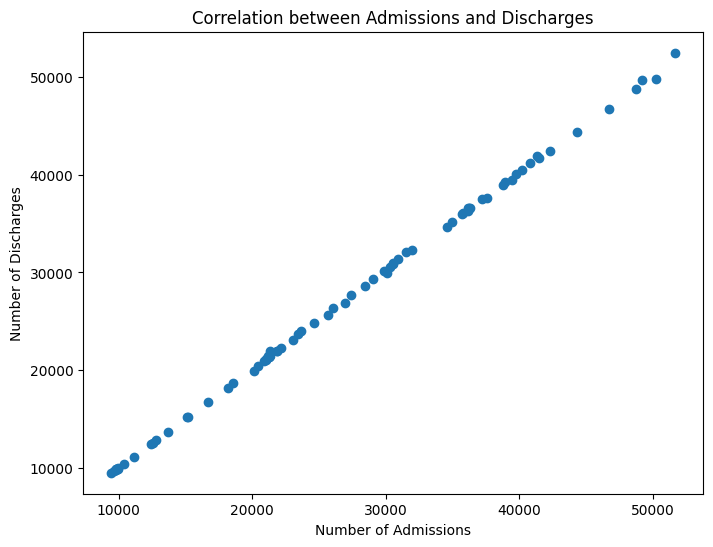

In [8]:
# @title Correlation between Admissions and Discharges

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'

plt.figure(figsize=(8, 6))
plt.scatter(df['NumberOfAdmissions'], df['NumberOfDischarges'], marker='o')

plt.xlabel('Number of Admissions')
plt.ylabel('Number of Discharges')
_ = plt.title('Correlation between Admissions and Discharges')

In [9]:
df1 = df.drop(columns=['Country','DatasetQF','NumberOfHospitalResidents','NumberOfHospitalResidentsQF', 'Dataset'])
df1.head()

,_id,FinancialYear,NumberOfAdmissions,NumberOfDischarges,NumberOfStays,NumberOfPatients
0,1,1997/98,41460,41780,38150,28180
1,2,1997/98,9450,9480,8700,7760
2,3,1997/98,32010,32300,29450,21530
3,4,1998/99,41380,41900,38010,28400
4,5,1998/99,9830,9840,8920,7890


Some values in the columns are stored as strings instead of numerical values, which makes it difficult to apply calculations like sums, averages, or comparisons. This can often happen if the data has special characters, extra spaces, or other non-numeric elements mixed in.

Let's attempt to clean and convert these values into proper numerical types.

In [11]:
# Check the data types of each column
print(df1.dtypes)

# View some rows where numeric columns might contain non-numeric values
df1.head()

#drops duplicate rows
df1.drop_duplicates()
#drops empty values in columns
df1.dropna()


_id                    int64
FinancialYear         object
NumberOfAdmissions     int64
NumberOfDischarges     int64
NumberOfStays          int64
NumberOfPatients       int64
dtype: object


,_id,FinancialYear,NumberOfAdmissions,NumberOfDischarges,NumberOfStays,NumberOfPatients
0,1,1997/98,41460,41780,38150,28180
1,2,1997/98,9450,9480,8700,7760
2,3,1997/98,32010,32300,29450,21530
3,4,1998/99,41380,41900,38010,28400
4,5,1998/99,9830,9840,8920,7890
...,...,...,...,...,...,...
70,71,2020/21,30120,29900,15390,12420
71,72,2020/21,20130,19920,15040,12200
72,73,2021/22,49180,49690,30520,23570
73,74,2021/22,30580,30980,15950,12700


Convert Strings to Numeric Values
We can use the pd.to_numeric() function to convert string columns into numerical columns. We'll also use the errors='coerce' argument to convert any invalid parsing into NaN values.

In [13]:
#Extract StartYear from the first four characters
df['StartYear'] = df['FinancialYear'].str[:4].astype(int)

# Calculate EndYear based on the last two characters
df['EndYear'] = df['FinancialYear'].apply(
    lambda x: int('20' + x[5:]) if int(x[5:]) < 50 else int('19' + x[5:])
)

print(df)

    _id FinancialYear    Country Dataset DatasetQF  NumberOfAdmissions  \
0     1       1997/98  S92000003   Total         d               41460   
1     2       1997/98  S92000003   Total         d                9450   
2     3       1997/98  S92000003   SMR04                         32010   
3     4       1998/99  S92000003   Total         d               41380   
4     5       1998/99  S92000003   Total         d                9830   
..  ...           ...        ...     ...       ...                 ...   
70   71       2020/21  S92000003   Total         d               30120   
71   72       2020/21  S92000003   SMR04                         20130   
72   73       2021/22  S92000003   Total         d               49180   
73   74       2021/22  S92000003   Total         d               30580   
74   75       2021/22  S92000003   SMR04                         18600   

    NumberOfDischarges  NumberOfStays  NumberOfPatients  \
0                41780          38150             28

The two  variables I would want to focus on are Number of Admissions and Number of Discharges per year.

In [ ]:
df1.groupby('FinancialYear')[['NumberOfAdmissions', 'NumberOfDischarges', 'NumberOfStays']].sum()
df1.groupby('FinancialYear')[['NumberOfAdmissions', 'NumberOfDischarges', 'NumberOfStays']].mean()
df1.groupby('FinancialYear')[['NumberOfAdmissions', 'NumberOfDischarges', 'NumberOfStays']].std()


,NumberOfAdmissions,NumberOfDischarges,NumberOfStays
FinancialYear,,,
1997/98,16446.358260,16602.774868,15130.295216
1998/99,16144.089734,16423.548135,14904.409862
1999/00,15806.196042,16035.463822,14358.768517
2000/01,15628.603051,15772.093499,13934.250369
2001/02,15202.158838,15390.095300,13514.267769
2002/03,14758.812057,14932.903268,13284.044314
2003/04,14379.248937,14476.187343,12733.425829
2004/05,13875.605692,14050.135231,12300.391593
2005/06,13147.513073,13314.638561,11755.680896


In [1]:
# Data Cleaning Notebook

# 1. Import Libraries
import pandas as pd

# 2. Load the Dataset
file_path = "path/to/your/dataset.csv"
df = pd.read_csv(file_path)

# 3. Initial Data Inspection
# Display the first few rows
df.head()

# Check data types
df.dtypes

# Check for missing values
df.isnull().sum()

# Display basic statistics
df.describe()

# 4. Data Cleaning Steps
# Example: Convert FinancialYear to an integer representing the start year
df['FinancialYear_Start'] = df['FinancialYear'].str[:4].astype(int)

# Convert numeric columns if necessary
numeric_columns = ['NumberOfAdmissions', 'NumberOfDischarges', 'NumberOfStays', 'NumberOfPatients', 'NumberOfHospitalResidents']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remove duplicate rows
df = df.drop_duplicates()

# 5. Save Cleaned Data
cleaned_file_path = "cleaned_dataset.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/dataset.csv'